In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import statsmodels.api as sm 
from sklearn import preprocessing
from statsmodels.formula.api import ols
from scipy.stats import chi2_contingency
from matplotlib import rcParams
rcParams["patch.force_edgecolor"]=True
rcParams["patch.facecolor"]="r"

In [2]:
Bank_df=pd.read_csv(r"C:\Users\sonia\OneDrive\Desktop\Data Science\Datasets\Bank Marketing-Classification\new_train.csv")

In [3]:
df=pd.DataFrame(data=Bank_df)

In [4]:
###Goal:- The classification goal is to predict if the client will subscribe (yes/no) a term deposit (variable y).

In [5]:
df

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,y
0,49,blue-collar,married,basic.9y,unknown,no,no,cellular,nov,wed,227,4,999,0,nonexistent,no
1,37,entrepreneur,married,university.degree,no,no,no,telephone,nov,wed,202,2,999,1,failure,no
2,78,retired,married,basic.4y,no,no,no,cellular,jul,mon,1148,1,999,0,nonexistent,yes
3,36,admin.,married,university.degree,no,yes,no,telephone,may,mon,120,2,999,0,nonexistent,no
4,59,retired,divorced,university.degree,no,no,no,cellular,jun,tue,368,2,999,0,nonexistent,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32945,28,services,single,high.school,no,yes,no,cellular,jul,tue,192,1,999,0,nonexistent,no
32946,52,technician,married,professional.course,no,yes,no,cellular,nov,fri,64,1,999,1,failure,no
32947,54,admin.,married,basic.9y,no,no,yes,cellular,jul,mon,131,4,999,0,nonexistent,no
32948,29,admin.,married,university.degree,no,no,no,telephone,may,fri,165,1,999,0,nonexistent,no


In [6]:
#Combining the three levels basic.6y,basic.4y, basic.9y to basic of variaable Education.
df.replace(['basic.6y','basic.4y', 'basic.9y',"illiterate"], 'basic',inplace=True)
df

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,y
0,49,blue-collar,married,basic,unknown,no,no,cellular,nov,wed,227,4,999,0,nonexistent,no
1,37,entrepreneur,married,university.degree,no,no,no,telephone,nov,wed,202,2,999,1,failure,no
2,78,retired,married,basic,no,no,no,cellular,jul,mon,1148,1,999,0,nonexistent,yes
3,36,admin.,married,university.degree,no,yes,no,telephone,may,mon,120,2,999,0,nonexistent,no
4,59,retired,divorced,university.degree,no,no,no,cellular,jun,tue,368,2,999,0,nonexistent,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32945,28,services,single,high.school,no,yes,no,cellular,jul,tue,192,1,999,0,nonexistent,no
32946,52,technician,married,professional.course,no,yes,no,cellular,nov,fri,64,1,999,1,failure,no
32947,54,admin.,married,basic,no,no,yes,cellular,jul,mon,131,4,999,0,nonexistent,no
32948,29,admin.,married,university.degree,no,no,no,telephone,may,fri,165,1,999,0,nonexistent,no


In [7]:
#Replacing "unknown" to "na" in the dataset.
df=df.replace(r'unknown', np.nan)
df=df.replace(r'nonexistent', np.nan)
df

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,y
0,49,blue-collar,married,basic,NaN,no,no,cellular,nov,wed,227,4,999,0,NaN,no
1,37,entrepreneur,married,university.degree,no,no,no,telephone,nov,wed,202,2,999,1,failure,no
2,78,retired,married,basic,no,no,no,cellular,jul,mon,1148,1,999,0,NaN,yes
3,36,admin.,married,university.degree,no,yes,no,telephone,may,mon,120,2,999,0,NaN,no
4,59,retired,divorced,university.degree,no,no,no,cellular,jun,tue,368,2,999,0,NaN,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32945,28,services,single,high.school,no,yes,no,cellular,jul,tue,192,1,999,0,NaN,no
32946,52,technician,married,professional.course,no,yes,no,cellular,nov,fri,64,1,999,1,failure,no
32947,54,admin.,married,basic,no,no,yes,cellular,jul,mon,131,4,999,0,NaN,no
32948,29,admin.,married,university.degree,no,no,no,telephone,may,fri,165,1,999,0,NaN,no


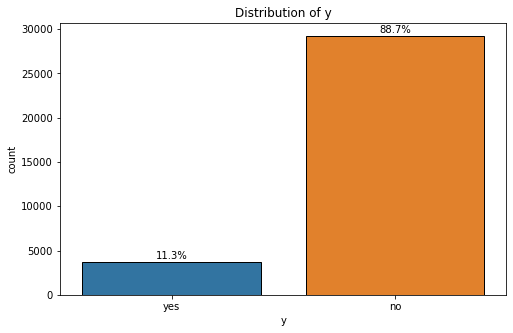

In [8]:
rcParams['figure.figsize'] = 8,5
dist=sns.countplot(x="y",data=df,order=["yes","no"])
dist.set_title("Distribution of y")
total = len(df)
for p in dist.patches:
    percentage = f'{100 * p.get_height() / total:.1f}%\n'
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()
    dist.annotate(percentage, (x, y), ha='center', va='center')
plt.show()
dist.figure.savefig("y.png") 

In [9]:
#Checking the null values
df.isnull().sum()

age                0
job              265
marital           65
education       1397
default         6940
housing          796
loan             796
contact            0
month              0
day_of_week        0
duration           0
campaign           0
pdays              0
previous           0
poutcome       28416
y                  0
dtype: int64

In [10]:
df.groupby("loan")["y"].count()

loan
no     27131
yes     5023
Name: y, dtype: int64

In [11]:
df.groupby("default")["y"].count()

default
no     26007
yes        3
Name: y, dtype: int64

In [12]:
df.groupby("poutcome")["y"].count()

poutcome
failure    3429
success    1105
Name: y, dtype: int64

In [13]:
# Imputing missing values
#filling the missing values of categorical variables with mode
df["marital"].fillna(value=df["marital"].mode()[0],inplace=True)
df["job"].fillna(value=df["job"].mode()[0],inplace=True)
df["education"].fillna(value=df["education"].mode()[0],inplace=True)
df["housing"].fillna(value=df["housing"].mode()[0],inplace=True)
df['default'] = df['default'].fillna(pd.Series(np.random.choice(['yes', 'no'], 
                                                      p=[0.5, 0.5], size=len(df))))
df['poutcome'] = df['poutcome'].fillna(pd.Series(np.random.choice(['success', 'failure'], 
                                                      p=[0.5, 0.5], size=len(df))))
df['loan'] = df['loan'].fillna(pd.Series(np.random.choice(['yes', 'no'], 
                                                      p=[0.5, 0.5], size=len(df))))


In [14]:
df.isna().sum()

age            0
job            0
marital        0
education      0
default        0
housing        0
loan           0
contact        0
month          0
day_of_week    0
duration       0
campaign       0
pdays          0
previous       0
poutcome       0
y              0
dtype: int64

In [15]:
# Visualisation of Categorical Variables

In [16]:
# 1.Job
df["job"].unique()

array(['blue-collar', 'entrepreneur', 'retired', 'admin.', 'student',
       'services', 'technician', 'self-employed', 'management',
       'unemployed', 'housemaid'], dtype=object)

In [17]:
data = df.groupby(["job","y"]).agg({"y":["count"]})
data

y
                  count
job           y        
admin.        no   7476
              yes  1103
blue-collar   no   6926
              yes   515
entrepreneur  no   1060
              yes   100
housemaid     no    769
              yes    86
management    no   2076
              yes   269
retired       no   1018
              yes   348
self-employed no    980
              yes   119
services      no   2942
              yes   254
student       no    494
              yes   217
technician    no   4815
              yes   585
unemployed    no    682
              yes   116

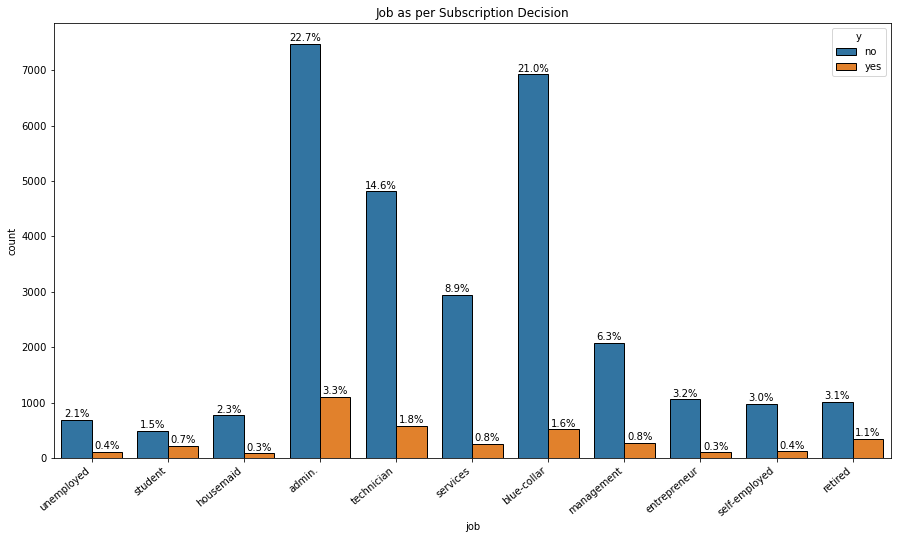

In [18]:
rcParams['figure.figsize'] = 15,8
total = len(df)
plot=sns.countplot(x="job",data=df,hue="y",order=['unemployed','student','housemaid','admin.','technician',
                                                                            'services','blue-collar','management', 'entrepreneur','self-employed', 
                                                                            'retired'])
plot.set_xticklabels(plot.get_xticklabels(), rotation=40, ha="right")
       
plot.set_title('Job as per Subscription Decision')
for p in plot.patches:
    percentage = f'{100 * p.get_height() / total:.1f}%\n'
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()
    plot.annotate(percentage, (x, y), ha='center', va='center')
plt.show()
plot.figure.savefig('NJob.png')

In [19]:
chisqt_job = pd.crosstab(df.job, df.y, margins=True)
print(chisqt_job)

y                 no   yes    All
job                              
admin.          7476  1103   8579
blue-collar     6926   515   7441
entrepreneur    1060   100   1160
housemaid        769    86    855
management      2076   269   2345
retired         1018   348   1366
self-employed    980   119   1099
services        2942   254   3196
student          494   217    711
technician      4815   585   5400
unemployed       682   116    798
All            29238  3712  32950


In [20]:
from scipy.stats import chi2_contingency 
value = np.array([chisqt_job.iloc[0].values,chisqt_job.iloc[1].values,chisqt_job.iloc[2].values,chisqt_job.iloc[3].values,
                  chisqt_job.iloc[4].values,chisqt_job.iloc[5].values,chisqt_job.iloc[6].values,chisqt_job.iloc[7].values,
                  chisqt_job.iloc[8].values,chisqt_job.iloc[9].values])
print(chi2_contingency(value)[0:3])

(752.2712305309708, 4.4970126314001315e-148, 18)


In [21]:
#As the p value is less than 0.05, we reject the null hypothesis that y and job level  are independent of each other.
#Therefore "job" is a significant variable in the prediction of subscription decision of the client.

In [22]:
#2.Marital
# count of term deposit as per Marital status  
data = df.groupby(["marital","y"]).agg({"y":["count"]})
data

y
              count
marital  y         
divorced no    3304
         yes    371
married  no   17987
         yes   2031
single   no    7947
         yes   1310

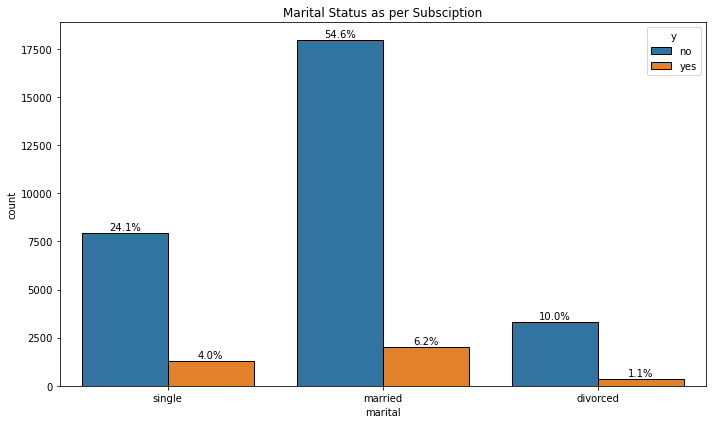

In [23]:
#Term Deposit as per marital status
rcParams['figure.figsize'] = 10,6
ax=sns.countplot(x="marital",data=df,hue="y",order=["single","married","divorced"])
ax.set_title("Marital Status as per Subsciption")
total = len(df)
for p in ax.patches:
    percentage = f'{100 * p.get_height() / total:.1f}%\n'
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()
    ax.annotate(percentage, (x, y), ha='center', va='center')
plt.tight_layout()
plt.show()
ax.figure.savefig("NMarital.png")

In [24]:
chisqt_marital = pd.crosstab(df.marital, df.y, margins=True)
print(chisqt_marital)

y            no   yes    All
marital                     
divorced   3304   371   3675
married   17987  2031  20018
single     7947  1310   9257
All       29238  3712  32950


In [25]:
from scipy.stats import chi2_contingency 
value = np.array([chisqt_marital.iloc[0].values,chisqt_marital.iloc[1].values,chisqt_marital.iloc[2].values,
                  chisqt_marital.iloc[3].values])
print(chi2_contingency(value)[0:3])

(107.26433804987381, 7.618286741250298e-21, 6)


In [26]:
#As the p value is less than 0.05, we reject the null hypothesis that y and marital level  are independent of each other.
#Therefore "marital" is a significant variable in the prediction of subscription decision of the client.

In [27]:
# 3.Education

In [28]:
Edu = df.groupby(["education","y"]).agg({"y":["count"]})
Edu

y
                         count
education           y         
basic               no   10347
                    yes   1079
high.school         no    6781
                    yes    815
professional.course no    3719
                    yes    473
university.degree   no    8391
                    yes   1345

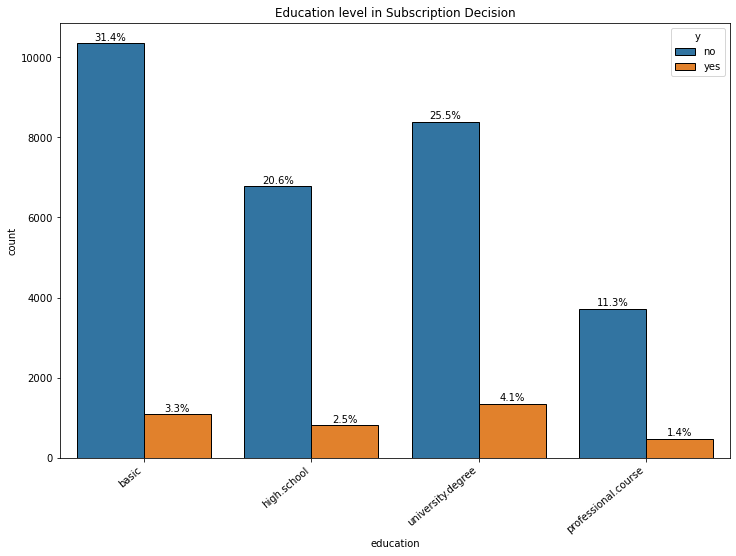

In [29]:
rcParams['figure.figsize'] = 12,8
plot2=sns.countplot(x="education",data=df,hue="y",order=["basic","high.school","university.degree","professional.course"])
plot2.set_xticklabels(plot2.get_xticklabels(), rotation=40, ha="right")
plot2.set_title("Education level in Subscription Decision")
for p in plot2.patches:
    percentage = f'{100 * p.get_height() / total:.1f}%\n'
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()
    plot2.annotate(percentage, (x, y), ha='center', va='center')
plt.show()
plot2.figure.savefig("Neducation.png")

In [30]:
chisqt_edu = pd.crosstab(df.education, df.y, margins=True)
print(chisqt_edu)

y                       no   yes    All
education                              
basic                10347  1079  11426
high.school           6781   815   7596
professional.course   3719   473   4192
university.degree     8391  1345   9736
All                  29238  3712  32950


In [31]:
from scipy.stats import chi2_contingency 
value = np.array([chisqt_edu.iloc[0].values,chisqt_edu.iloc[1].values,chisqt_edu.iloc[2].values,chisqt_edu.iloc[3].values,
                  chisqt_edu.iloc[4].values])
print(chi2_contingency(value)[0:3])

(103.42693317619161, 8.496006860727313e-19, 8)


In [32]:
#As the p value is less than 0.05, we reject the null hypothesis that y and education level  are independent of each other.
#Therefore "education" is a significant variable in the prediction of subscription decision of the client.

In [33]:
# 4.default

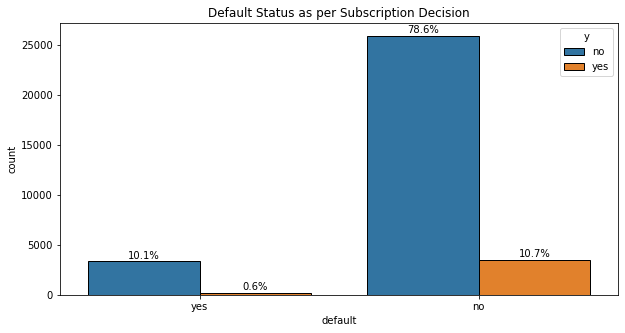

In [34]:
rcParams['figure.figsize'] = 10,5
plot4=sns.countplot(x="default",data=df,hue="y",order=["yes","no"])
plot4.set_title("Default Status as per Subscription Decision")
for p in plot4.patches:
    percentage = f'{100 * p.get_height() / total:.1f}%\n'
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()
    plot4.annotate(percentage, (x, y), ha='center', va='center')
plt.show()
plot4.figure.savefig("Ndefault")

In [35]:
chisqt_def = pd.crosstab(df.default, df.y, margins=True)
print(chisqt_def)

y           no   yes    All
default                    
no       25902  3518  29420
yes       3336   194   3530
All      29238  3712  32950


In [36]:
from scipy.stats import chi2_contingency 
value = np.array([chisqt_def.iloc[0].values,chisqt_def.iloc[1].values])
print(chi2_contingency(value)[0:3])

(131.6632766792646, 2.5685187148522366e-29, 2)


In [37]:
#As the p value is less than 0.05, we reject the null hypothesis that y and default are independent of each other.
#Therefore "default" is a significant variable in the prediction of subscription decision of the client.

In [38]:
# 5. Housing

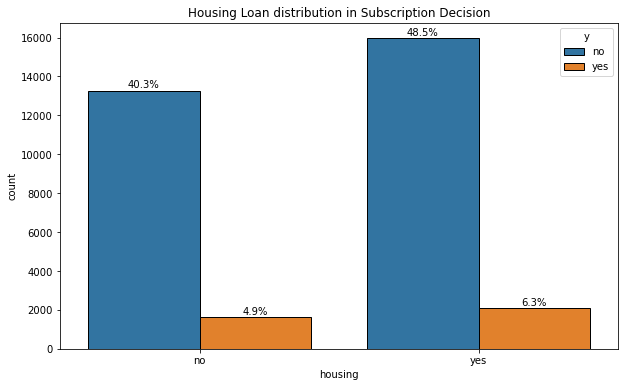

In [39]:
rcParams['figure.figsize'] = 10,6
plot3=sns.countplot(x="housing",data=df,hue="y")
plot3.set_title("Housing Loan distribution in Subscription Decision")
for p in plot3.patches:
    percentage = f'{100 * p.get_height() / total:.1f}%\n'
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()
    plot3.annotate(percentage, (x, y), ha='center', va='center')
plt.show()
plot3.figure.savefig("Nhousing.png")

In [40]:
chisqt_housing = pd.crosstab(df.housing, df.y, margins=True)
print(chisqt_housing)

y           no   yes    All
housing                    
no       13272  1628  14900
yes      15966  2084  18050
All      29238  3712  32950


In [41]:
from scipy.stats import chi2_contingency 
value = np.array([chisqt_housing.iloc[0].values,chisqt_housing.iloc[1].values])
print(chi2_contingency(value)[0:3])

(3.1339392616956725, 0.20867659227927324, 2)


In [42]:
#As the p value is more than 0.05, we fail to reject the null hypothesis that y and housing level are independent of each other.
#Therefore "housing" is not a significant variable in the prediction of subscription decision of the client.
#We can drop this variable.

In [43]:
# 6.Loan

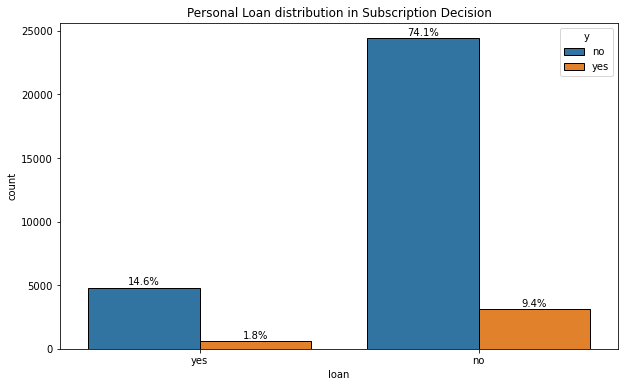

In [44]:
plot_loan=sns.countplot(x="loan",data=df,hue="y",order=["yes","no"])
plot_loan.set_title("Personal Loan distribution in Subscription Decision")
for p in plot_loan.patches:
    percentage = f'{100 * p.get_height() / total:.1f}%\n'
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()
    plot_loan.annotate(percentage, (x, y), ha='center', va='center')
plt.show()
plot_loan.figure.savefig("NPersonalLoan.png")

In [45]:
chisqt_loan = pd.crosstab(df.loan, df.y, margins=True)
print(chisqt_loan)

y        no   yes    All
loan                    
no    24425  3107  27532
yes    4813   605   5418
All   29238  3712  32950


In [46]:
from scipy.stats import chi2_contingency 
value = np.array([chisqt_loan.iloc[0].values,chisqt_loan.iloc[1].values])
print(chi2_contingency(value)[0:3])

(0.06366661145361723, 0.968668040036663, 2)


In [47]:
#As the p value is more than 0.05, we fail to reject the null hypothesis that y and loan are independent of each other.
#Therefore "loan" is not a significant variable in the prediction of subscription decision of the client.

In [48]:
# 7.Contact

In [49]:
df["contact"].unique()

array(['cellular', 'telephone'], dtype=object)

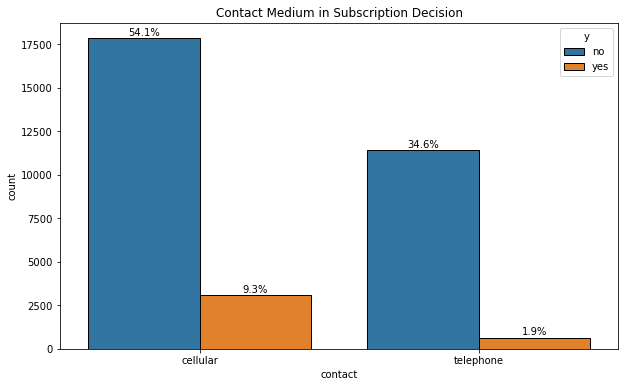

In [50]:
plot_contact=sns.countplot(x="contact",data=df,hue="y")
plot_contact.set_title("Contact Medium in Subscription Decision")
for p in plot_contact.patches:
    percentage = f'{100 * p.get_height() / total:.1f}%\n'
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()
    plot_contact.annotate(percentage, (x, y), ha='center', va='center')
plt.show()
plot_contact.figure.savefig("NContact.png")

In [51]:
chisqt_contact = pd.crosstab(df.contact, df.y, margins=True)
print(chisqt_contact)

y             no   yes    All
contact                      
cellular   17834  3074  20908
telephone  11404   638  12042
All        29238  3712  32950


In [52]:
from scipy.stats import chi2_contingency 
value = np.array([chisqt_contact.iloc[0].values,chisqt_contact.iloc[1].values])
print(chi2_contingency(value)[0:3])

(676.0386375051955, 1.585167242486104e-147, 2)


In [53]:
#As the p value is less than 0.05, we  reject the null hypothesis that y and contact medium are independent of each other.
#Therefore "contact" is a significant variable in the prediction of subscription decision of the client.

In [54]:
#8.Month

In [55]:
df["month"].unique()

array(['nov', 'jul', 'may', 'jun', 'aug', 'mar', 'oct', 'apr', 'sep',
       'dec'], dtype=object)

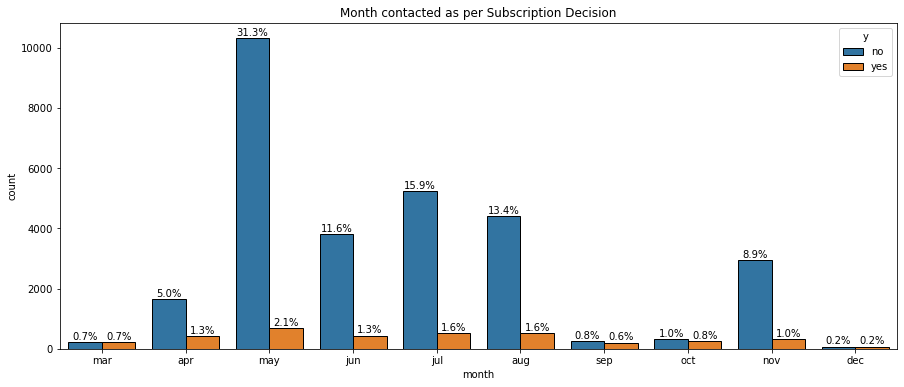

In [56]:
rcParams['figure.figsize'] = 15,6
plot6=sns.countplot(x=df["month"],order=["mar","apr","may","jun","jul","aug","sep","oct","nov","dec"],data=df,hue="y")
plot6.set_title("Month contacted as per Subscription Decision")
for p in plot6.patches:
    percentage = f'{100 * p.get_height() / total:.1f}%\n'
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()
    plot6.annotate(percentage, (x, y), ha='center', va='center')
plt.show()
plot6.figure.savefig("month")

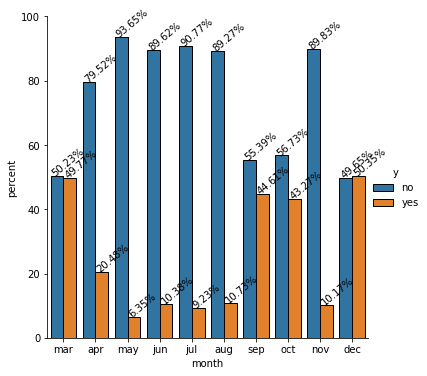

In [57]:
#Conversion per month
rcParams['figure.figsize'] = 15,6
df1 = df.groupby("month")["y"].value_counts(normalize=True)
df1 = df1.mul(100)
df1 = df1.rename('percent').reset_index()

g = sns.catplot(x="month",y='percent',hue="y",kind='bar',data=df1,order=["mar","apr","may","jun","jul","aug","sep","oct","nov","dec"])
g.ax.set_ylim(0,100)

for p in g.ax.patches:
    txt = str(p.get_height().round(2)) + '%'
    txt_x = p.get_x() 
    txt_y = p.get_height()
    g.ax.text(txt_x,txt_y,txt,rotation=40)
g.savefig("Nmonth_Conversion")

In [58]:
chisqt_month = pd.crosstab(df.month, df.y, margins=True)
print(chisqt_month)

y         no   yes    All
month                    
apr     1658   427   2085
aug     4417   531   4948
dec       71    72    143
jul     5231   532   5763
jun     3806   441   4247
mar      219   217    436
may    10312   699  11011
nov     2934   332   3266
oct      333   254    587
sep      257   207    464
All    29238  3712  32950


In [59]:
from scipy.stats import chi2_contingency 
value = np.array([chisqt_month.iloc[0].values,chisqt_month.iloc[1].values,chisqt_month.iloc[2].values,chisqt_month.iloc[3].values,
                  chisqt_month.iloc[4].values,chisqt_month.iloc[5].values,chisqt_month.iloc[6].values,chisqt_month.iloc[7].values,
                  chisqt_month.iloc[8].values,chisqt_month.iloc[9].values])
print(chi2_contingency(value)[0:3])

(2458.782515898926, 0.0, 18)


In [60]:
#As the p value is less than 0.05, we  reject the null hypothesis that y and contact month are independent of each other.
#Therefore "month" is a significant variable in the prediction of subscription decision of the client.

In [61]:
#9.Day of the Week

In [62]:
data=df["day_of_week"].value_counts()
data

thu    6857
mon    6812
wed    6515
tue    6444
fri    6322
Name: day_of_week, dtype: int64

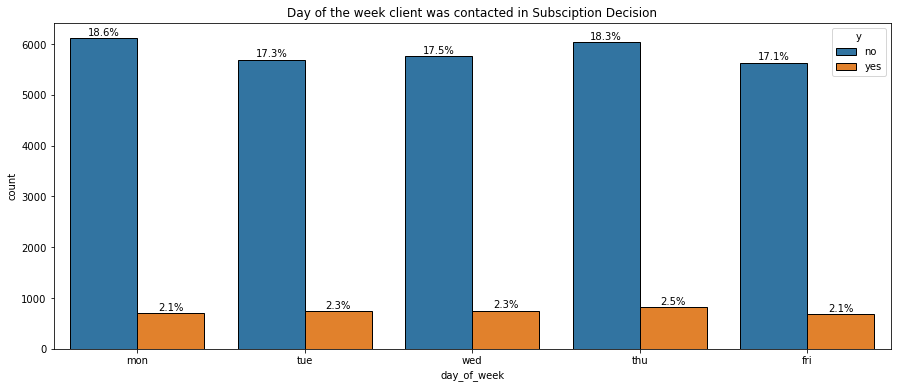

In [63]:
plot5=sns.countplot(x=df["day_of_week"],order=["mon","tue","wed","thu","fri"],data=df,hue="y")
plot5.set_title("Day of the week client was contacted in Subsciption Decision")
for p in plot5.patches:
    percentage = f'{100 * p.get_height() / total:.1f}%\n'
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()
    plot5.annotate(percentage, (x, y), ha='center', va='center')
plt.show()
plot5.figure.savefig("NDay_of_week")

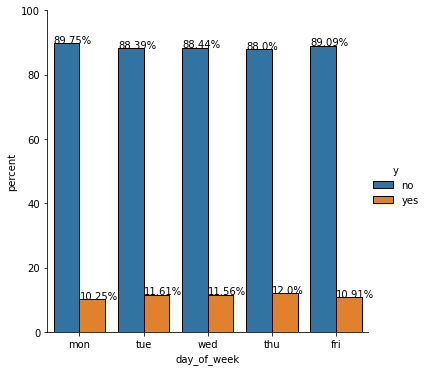

In [64]:
#Subscription per day conversion

df1 = df.groupby("day_of_week")["y"].value_counts(normalize=True)
df1 = df1.mul(100)
df1 = df1.rename('percent').reset_index()

g = sns.catplot(x="day_of_week",y='percent',hue="y",kind='bar',data=df1,order=["mon","tue","wed","thu","fri"])
g.ax.set_ylim(0,100)

for p in g.ax.patches:
    txt = str(p.get_height().round(2)) + '%'
    txt_x = p.get_x() 
    txt_y = p.get_height()
    g.ax.text(txt_x,txt_y,txt)
g.savefig("NDay_Conversion")

In [65]:
chisqt_day = pd.crosstab(df.day_of_week, df.y, margins=True)
print(chisqt_day)

y               no   yes    All
day_of_week                    
fri           5632   690   6322
mon           6114   698   6812
thu           6034   823   6857
tue           5696   748   6444
wed           5762   753   6515
All          29238  3712  32950


In [66]:
from scipy.stats import chi2_contingency 
value = np.array([chisqt_day.iloc[0].values,chisqt_day.iloc[1].values,chisqt_day.iloc[2].values,chisqt_day.iloc[3].values,
                  chisqt_day.iloc[4].values])
print(chi2_contingency(value)[0:3])

(12.890706979436331, 0.11566577385811522, 8)


In [67]:
#As the p value is more than 0.05, we fail to reject the null hypothesis that y and loan are independent of each other.
#Therefore "day_of_week" is not a significant variable in the prediction of subscription decision of the client.

In [68]:
# 10.Poutcome

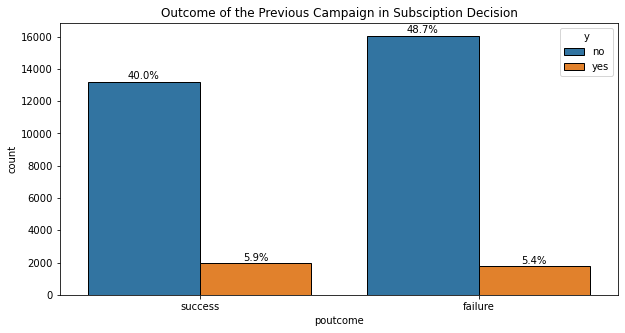

<Figure size 720x360 with 0 Axes>

In [69]:
rcParams['figure.figsize'] = 10,5
plot_pout=sns.countplot(x="poutcome",order=["success","failure"],data=df,hue="y")
plot_pout.set_title("Outcome of the Previous Campaign in Subsciption Decision")
for p in plot_pout.patches:
    percentage = f'{100 * p.get_height() / total:.1f}%\n'
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()
    plot_pout.annotate(percentage, (x, y), ha='center', va='center')
plt.show()
plt.savefig("Npoutcome")

In [70]:
chisqt_pout = pd.crosstab(df.poutcome, df.y, margins=True)
print(chisqt_pout)

y            no   yes    All
poutcome                    
failure   16043  1767  17810
success   13195  1945  15140
All       29238  3712  32950


In [71]:
from scipy.stats import chi2_contingency 
value = np.array([chisqt_pout.iloc[0].values,chisqt_pout.iloc[1].values])
print(chi2_contingency(value)[0:3])

(70.05699531978101, 6.127971784154297e-16, 2)


In [72]:
#As the p value is less than 0.05, we reject the null hypothesis that y and poutcome  are independent of each other.
#Therefore "poutcome" is a significant variable in the prediction of subscription decision of the client.

In [73]:
############ Numerical Variables#################

In [74]:
#11.Age

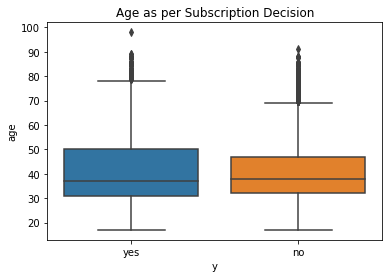

In [75]:
rcParams['figure.figsize'] = 6,4
sns.boxplot(x="y",y="age",data=df,order=["yes","no"]).set(title="Age as per Subscription Decision")
plt.savefig('Age.png')

In [76]:
model = ols('age ~ C(y)', data=df).fit()
aov_table = sm.stats.anova_lm(model, typ=2)
aov_table

,sum_sq,df,F,PR(>F)
C(y),2.931934e+03,1.0,27.109901,1.933636e-07
Residual,3.563325e+06,32948.0,NaN,NaN


In [77]:
#As the p value is less than 0.05, we reject the null hypothesis that y and age  are independent of each other.
#Therefore "age" is a significant variable in the prediction of subscription decision of the client.

In [78]:
#12.Duration

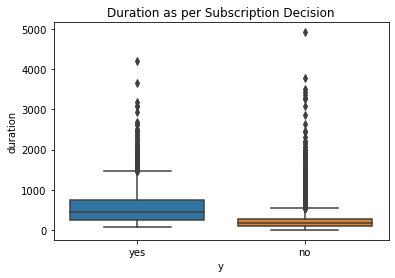

In [79]:
rcParams['figure.figsize'] = 6,4
sns.boxplot(x="y",y="duration",data=df,order=["yes","no"]).set_title("Duration as per Subscription Decision")
plt.savefig("duration")

In [80]:
model = ols('duration ~ C(y)', data=df).fit()
aov_table = sm.stats.anova_lm(model, typ=2)
aov_table

,sum_sq,df,F,PR(>F)
C(y),3.549047e+08,1.0,6303.936492,0.0
Residual,1.854936e+09,32948.0,NaN,NaN


In [81]:
#As the p value is less than 0.05, we reject the null hypothesis that y and duration  are independent of each other.
#Therefore "duration" is a significant variable in the prediction of subscription decision of the client.

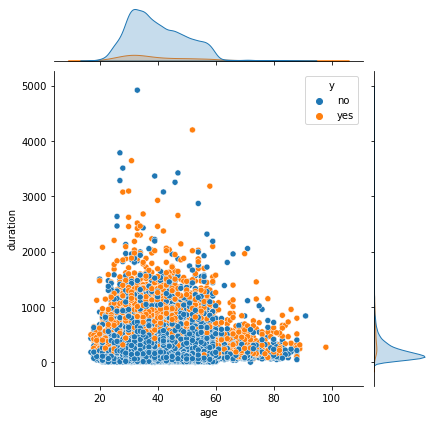

In [82]:
rcParams['figure.figsize'] = 6,4
sns.jointplot(x="age",y="duration",data=df,hue="y")
plt.savefig("ageduration")

In [83]:
# 13.Campaign

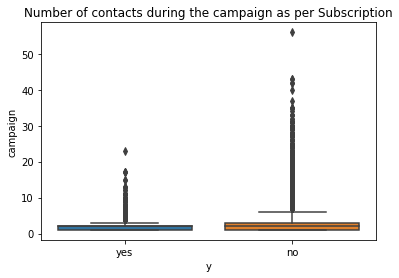

In [84]:
rcParams['figure.figsize'] = 6,4
sns.boxplot(x="y",y="campaign",data=df,order=["yes","no"]).set_title("Number of contacts during the campaign as per Subscription")
plt.savefig("campaign")

In [85]:
model = ols('campaign ~ C(y)', data=df).fit()
aov_table = sm.stats.anova_lm(model, typ=2)
aov_table

,sum_sq,df,F,PR(>F)
C(y),1069.586448,1.0,141.79734,1.256583e-32
Residual,248528.881412,32948.0,NaN,NaN


In [86]:
#As the p value is less than 0.05, we reject the null hypothesis that y and campaign  are independent of each other.
#Therefore "campaign" is a significant variable in the prediction of subscription decision of the client.

In [87]:
# 14. pdays

In [88]:
df["pdays"].unique()

array([999,   3,   6,  10,   8,   4,   9,  11,   7,  12,   5,   2,  22,
        25,  15,  17,   0,  14,  13,   1,  16,  18,  19,  21,  20,  27,
        26], dtype=int64)

<AxesSubplot:xlabel='pdays', ylabel='count'>

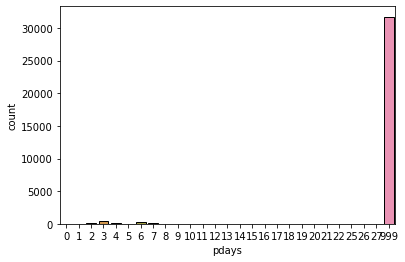

In [89]:
sns.countplot(x="pdays",data=df)


In [90]:

df["pdays"]=pd.cut(df['pdays'], bins=[-1,28,1000],labels=[1,0])
df        

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,y
0,49,blue-collar,married,basic,no,no,no,cellular,nov,wed,227,4,0,0,success,no
1,37,entrepreneur,married,university.degree,no,no,no,telephone,nov,wed,202,2,0,1,failure,no
2,78,retired,married,basic,no,no,no,cellular,jul,mon,1148,1,0,0,failure,yes
3,36,admin.,married,university.degree,no,yes,no,telephone,may,mon,120,2,0,0,failure,no
4,59,retired,divorced,university.degree,no,no,no,cellular,jun,tue,368,2,0,0,failure,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32945,28,services,single,high.school,no,yes,no,cellular,jul,tue,192,1,0,0,failure,no
32946,52,technician,married,professional.course,no,yes,no,cellular,nov,fri,64,1,0,1,failure,no
32947,54,admin.,married,basic,no,no,yes,cellular,jul,mon,131,4,0,0,success,no
32948,29,admin.,married,university.degree,no,no,no,telephone,may,fri,165,1,0,0,success,no


In [91]:
df["pdays"].unique()

[0, 1]
Categories (2, int64): [1 < 0]

<AxesSubplot:xlabel='pdays', ylabel='count'>

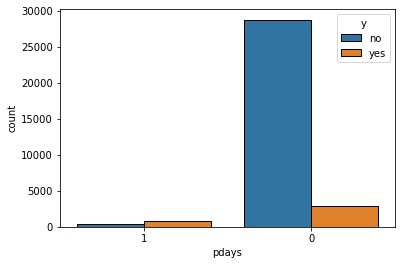

In [92]:
sns.countplot(x="pdays",hue="y",data=df)

In [93]:
df.pdays.value_counts()

0    31724
1     1226
Name: pdays, dtype: int64

In [94]:
df.isna().sum()

age            0
job            0
marital        0
education      0
default        0
housing        0
loan           0
contact        0
month          0
day_of_week    0
duration       0
campaign       0
pdays          0
previous       0
poutcome       0
y              0
dtype: int64

In [95]:
df.groupby("pdays")["y"].value_counts(normalize=True)

pdays  y  
1      yes    0.636215
       no     0.363785
0      no     0.907578
       yes    0.092422
Name: y, dtype: float64

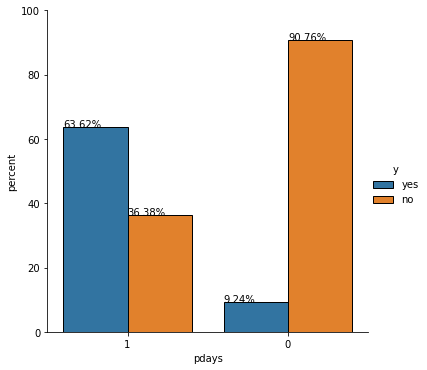

In [96]:
df2 = df.groupby("pdays")["y"].value_counts(normalize=True)
df2 = df2.mul(100)
df2 = df2.rename('percent').reset_index()

g = sns.catplot(x="pdays",y='percent',hue="y",kind='bar',data=df2)
g.ax.set_ylim(0,100)

for p in g.ax.patches:
    txt = str(p.get_height().round(2)) + '%'
    txt_x = p.get_x() 
    txt_y = p.get_height()
    g.ax.text(txt_x,txt_y,txt)
g.savefig("Pdays_Conversion")

In [97]:
chisqt_pdays = pd.crosstab(df.pdays, df.y, margins=True)
print(chisqt_pdays)

y         no   yes    All
pdays                    
1        446   780   1226
0      28792  2932  31724
All    29238  3712  32950


In [98]:
from scipy.stats import chi2_contingency 
value = np.array([chisqt_pdays.iloc[0].values,chisqt_pdays.iloc[1].values])
print(chi2_contingency(value)[0:3])

(3491.770854457325, 0.0, 2)


In [99]:
#As the p value is less than 0.05, we reject the null hypothesis that y and pdays  are independent of each other.
#Therefore "pdays" is a significant variable in the prediction of subscription decision of the client.

In [100]:
# 15.Previous

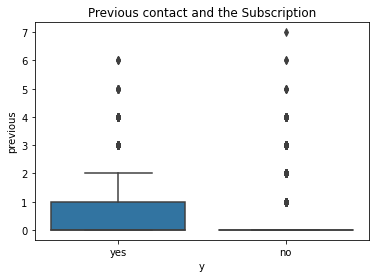

In [101]:
sns.boxplot(x="y",y="previous",data=df,order=["yes","no"]).set_title("Previous contact and the Subscription")
plt.savefig("previous")

In [102]:
model = ols('previous ~ C(y)', data=df).fit()
aov_table = sm.stats.anova_lm(model, typ=2)
aov_table

,sum_sq,df,F,PR(>F)
C(y),433.141671,1.0,1836.226549,0.0
Residual,7771.999482,32948.0,NaN,NaN


In [103]:
#As the p value is less than 0.05, we reject the null hypothesis that y and previous  are independent of each other.
#Therefore "previous" is a significant variable in the prediction of subscription decision of the client.

In [104]:
## Dropping insignificant Variables

In [105]:
df = df.drop('housing',axis=1)
df = df.drop('loan',axis=1)
df = df.drop('day_of_week',axis=1)
df

,age,job,marital,education,default,contact,month,duration,campaign,pdays,previous,poutcome,y
0,49,blue-collar,married,basic,no,cellular,nov,227,4,0,0,success,no
1,37,entrepreneur,married,university.degree,no,telephone,nov,202,2,0,1,failure,no
2,78,retired,married,basic,no,cellular,jul,1148,1,0,0,failure,yes
3,36,admin.,married,university.degree,no,telephone,may,120,2,0,0,failure,no
4,59,retired,divorced,university.degree,no,cellular,jun,368,2,0,0,failure,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...
32945,28,services,single,high.school,no,cellular,jul,192,1,0,0,failure,no
32946,52,technician,married,professional.course,no,cellular,nov,64,1,0,1,failure,no
32947,54,admin.,married,basic,no,cellular,jul,131,4,0,0,success,no
32948,29,admin.,married,university.degree,no,telephone,may,165,1,0,0,success,no


In [106]:
#Label Encoding for target variable y
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
df['y'] = labelencoder.fit_transform(df['y'])
df

,age,job,marital,education,default,contact,month,duration,campaign,pdays,previous,poutcome,y
0,49,blue-collar,married,basic,no,cellular,nov,227,4,0,0,success,0
1,37,entrepreneur,married,university.degree,no,telephone,nov,202,2,0,1,failure,0
2,78,retired,married,basic,no,cellular,jul,1148,1,0,0,failure,1
3,36,admin.,married,university.degree,no,telephone,may,120,2,0,0,failure,0
4,59,retired,divorced,university.degree,no,cellular,jun,368,2,0,0,failure,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
32945,28,services,single,high.school,no,cellular,jul,192,1,0,0,failure,0
32946,52,technician,married,professional.course,no,cellular,nov,64,1,0,1,failure,0
32947,54,admin.,married,basic,no,cellular,jul,131,4,0,0,success,0
32948,29,admin.,married,university.degree,no,telephone,may,165,1,0,0,success,0


In [107]:
df.corr()

,age,duration,campaign,previous,y
age,1.000000,-0.001841,0.003302,0.020670,0.028673
duration,-0.001841,1.000000,-0.075663,0.022538,0.400752
campaign,0.003302,-0.075663,1.000000,-0.079051,-0.065462
previous,0.020670,0.022538,-0.079051,1.000000,0.229759
y,0.028673,0.400752,-0.065462,0.229759,1.000000


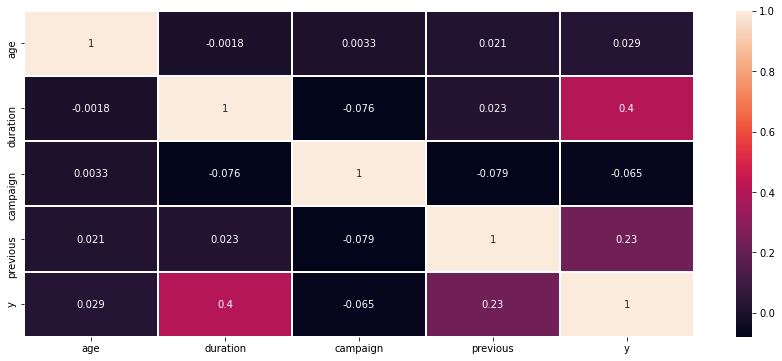

In [108]:
rcParams['figure.figsize'] = 15,6
sns.heatmap(df.corr(),annot=True,linecolor="white",linewidth=1)
plt.savefig("Ncorrplot")

In [109]:
###Encoding

In [110]:
df_new=df
df_new

,age,job,marital,education,default,contact,month,duration,campaign,pdays,previous,poutcome,y
0,49,blue-collar,married,basic,no,cellular,nov,227,4,0,0,success,0
1,37,entrepreneur,married,university.degree,no,telephone,nov,202,2,0,1,failure,0
2,78,retired,married,basic,no,cellular,jul,1148,1,0,0,failure,1
3,36,admin.,married,university.degree,no,telephone,may,120,2,0,0,failure,0
4,59,retired,divorced,university.degree,no,cellular,jun,368,2,0,0,failure,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
32945,28,services,single,high.school,no,cellular,jul,192,1,0,0,failure,0
32946,52,technician,married,professional.course,no,cellular,nov,64,1,0,1,failure,0
32947,54,admin.,married,basic,no,cellular,jul,131,4,0,0,success,0
32948,29,admin.,married,university.degree,no,telephone,may,165,1,0,0,success,0


In [111]:
pip install --upgrade category_encoders

Note: you may need to restart the kernel to use updated packages.


In [112]:
#Ordinal Encoding for job & education


In [113]:
job=["unemployed","student","housemaid","blue-collar","admin.","technician","services","self-employed","management","entrepreneur","retired"]

In [114]:
edu=["basic","high.school","university.degree","professional.course"]

In [115]:
from sklearn.preprocessing import OrdinalEncoder
ordi=OrdinalEncoder(categories=[job])
df_new["job"] = ordi.fit_transform(df_new[["job"]])
ord_ed=OrdinalEncoder(categories=[edu])
df_new["education"] = ord_ed.fit_transform(df_new[["education"]])
df_new


,age,job,marital,education,default,contact,month,duration,campaign,pdays,previous,poutcome,y
0,49,3.0,married,0.0,no,cellular,nov,227,4,0,0,success,0
1,37,9.0,married,2.0,no,telephone,nov,202,2,0,1,failure,0
2,78,10.0,married,0.0,no,cellular,jul,1148,1,0,0,failure,1
3,36,4.0,married,2.0,no,telephone,may,120,2,0,0,failure,0
4,59,10.0,divorced,2.0,no,cellular,jun,368,2,0,0,failure,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
32945,28,6.0,single,1.0,no,cellular,jul,192,1,0,0,failure,0
32946,52,5.0,married,3.0,no,cellular,nov,64,1,0,1,failure,0
32947,54,4.0,married,0.0,no,cellular,jul,131,4,0,0,success,0
32948,29,4.0,married,2.0,no,telephone,may,165,1,0,0,success,0


In [116]:
df_new.default.replace(('yes', 'no'), (1, 0), inplace=True)
df_new.poutcome.replace(("success","failure"),(1,0),inplace=True)
df_new

,age,job,marital,education,default,contact,month,duration,campaign,pdays,previous,poutcome,y
0,49,3.0,married,0.0,0,cellular,nov,227,4,0,0,1,0
1,37,9.0,married,2.0,0,telephone,nov,202,2,0,1,0,0
2,78,10.0,married,0.0,0,cellular,jul,1148,1,0,0,0,1
3,36,4.0,married,2.0,0,telephone,may,120,2,0,0,0,0
4,59,10.0,divorced,2.0,0,cellular,jun,368,2,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
32945,28,6.0,single,1.0,0,cellular,jul,192,1,0,0,0,0
32946,52,5.0,married,3.0,0,cellular,nov,64,1,0,1,0,0
32947,54,4.0,married,0.0,0,cellular,jul,131,4,0,0,1,0
32948,29,4.0,married,2.0,0,telephone,may,165,1,0,0,1,0


In [117]:
import category_encoders as ce

In [118]:
encoder=ce.OneHotEncoder(use_cat_names=True)
df_new=encoder.fit_transform(df_new)
df_new

C:\Users\sonia\anaconda3\lib\site-packages\category_encoders\utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):


,age,job,marital_married,marital_divorced,marital_single,education,default,contact_cellular,contact_telephone,month_nov,...,month_apr,month_sep,month_dec,duration,campaign,pdays_1.0,pdays_0.0,previous,poutcome,y
0,49,3.0,1,0,0,0.0,0,1,0,1,...,0,0,0,227,4,0,1,0,1,0
1,37,9.0,1,0,0,2.0,0,0,1,1,...,0,0,0,202,2,0,1,1,0,0
2,78,10.0,1,0,0,0.0,0,1,0,0,...,0,0,0,1148,1,0,1,0,0,1
3,36,4.0,1,0,0,2.0,0,0,1,0,...,0,0,0,120,2,0,1,0,0,0
4,59,10.0,0,1,0,2.0,0,1,0,0,...,0,0,0,368,2,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32945,28,6.0,0,0,1,1.0,0,1,0,0,...,0,0,0,192,1,0,1,0,0,0
32946,52,5.0,1,0,0,3.0,0,1,0,1,...,0,0,0,64,1,0,1,1,0,0
32947,54,4.0,1,0,0,0.0,0,1,0,0,...,0,0,0,131,4,0,1,0,1,0
32948,29,4.0,1,0,0,2.0,0,0,1,0,...,0,0,0,165,1,0,1,0,1,0


In [119]:
column_names=["age","job","marital_single","marital_married","marital_divorced","education","default","contact_cellular","contact_telephone","month_mar","month_apr","month_may","month_jun","month_jul","month_aug","month_sep","month_oct","month_nov","month_dec","duration","campaign","pdays_1.0","pdays_0.0","previous","poutcome","y"]
df_new.reindex(columns=column_names)


,age,job,marital_single,marital_married,marital_divorced,education,default,contact_cellular,contact_telephone,month_mar,...,month_oct,month_nov,month_dec,duration,campaign,pdays_1.0,pdays_0.0,previous,poutcome,y
0,49,3.0,0,1,0,0.0,0,1,0,0,...,0,1,0,227,4,0,1,0,1,0
1,37,9.0,0,1,0,2.0,0,0,1,0,...,0,1,0,202,2,0,1,1,0,0
2,78,10.0,0,1,0,0.0,0,1,0,0,...,0,0,0,1148,1,0,1,0,0,1
3,36,4.0,0,1,0,2.0,0,0,1,0,...,0,0,0,120,2,0,1,0,0,0
4,59,10.0,0,0,1,2.0,0,1,0,0,...,0,0,0,368,2,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32945,28,6.0,1,0,0,1.0,0,1,0,0,...,0,0,0,192,1,0,1,0,0,0
32946,52,5.0,0,1,0,3.0,0,1,0,0,...,0,1,0,64,1,0,1,1,0,0
32947,54,4.0,0,1,0,0.0,0,1,0,0,...,0,0,0,131,4,0,1,0,1,0
32948,29,4.0,0,1,0,2.0,0,0,1,0,...,0,0,0,165,1,0,1,0,1,0


In [120]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32950 entries, 0 to 32949
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   age                32950 non-null  int64  
 1   job                32950 non-null  float64
 2   marital_married    32950 non-null  int64  
 3   marital_divorced   32950 non-null  int64  
 4   marital_single     32950 non-null  int64  
 5   education          32950 non-null  float64
 6   default            32950 non-null  int64  
 7   contact_cellular   32950 non-null  int64  
 8   contact_telephone  32950 non-null  int64  
 9   month_nov          32950 non-null  int64  
 10  month_jul          32950 non-null  int64  
 11  month_may          32950 non-null  int64  
 12  month_jun          32950 non-null  int64  
 13  month_aug          32950 non-null  int64  
 14  month_mar          32950 non-null  int64  
 15  month_oct          32950 non-null  int64  
 16  month_apr          329

In [121]:
df_new.corr()

,age,job,marital_married,marital_divorced,marital_single,education,default,contact_cellular,contact_telephone,month_nov,...,month_apr,month_sep,month_dec,duration,campaign,pdays_1.0,pdays_0.0,previous,poutcome,y
age,1.000000,0.285066,0.272921,0.166300,-0.412980,-0.096644,0.113613,-0.007760,0.007760,0.030311,...,0.015919,0.034747,0.043224,-0.001841,0.003302,0.031946,-0.031946,0.020670,0.010831,0.028673
job,0.285066,1.000000,0.071792,0.057559,-0.118310,0.200279,-0.035138,0.026852,-0.026852,0.061837,...,0.017800,0.022016,0.006335,0.004301,-0.002002,0.000546,-0.000546,0.008339,-0.002448,0.026860
marital_married,0.272921,0.071792,1.000000,-0.440816,-0.777683,-0.120811,0.087905,-0.063650,0.063650,0.003706,...,-0.019068,-0.012075,0.004844,-0.001477,-0.001315,-0.032124,0.032124,-0.045651,0.014099,-0.044061
marital_divorced,0.166300,0.057559,-0.440816,1.000000,-0.221465,0.020810,-0.013002,-0.002387,0.002387,0.026693,...,0.008892,-0.007979,-0.004325,-0.008856,0.004861,-0.015148,0.015148,-0.003302,-0.003986,-0.013115
marital_single,-0.412980,-0.118310,-0.777683,-0.221465,1.000000,0.116676,-0.086395,0.070823,-0.070823,-0.022721,...,0.014488,0.018707,-0.002234,0.007807,-0.001976,0.045510,-0.045510,0.051909,-0.012525,0.057054
education,-0.096644,0.200279,-0.120811,0.020810,0.116676,1.000000,-0.125851,0.103995,-0.103995,0.052780,...,-0.000069,0.029763,0.011810,-0.017179,0.001060,0.035605,-0.035605,0.023463,0.008799,0.041720
default,0.113613,-0.035138,0.087905,-0.013002,-0.086395,-0.125851,1.000000,-0.090865,0.090865,-0.060059,...,-0.032393,-0.038067,-0.018391,-0.005978,0.018363,-0.053579,0.053579,-0.070744,0.006699,-0.063213
contact_cellular,-0.007760,0.026852,-0.063650,-0.002387,0.070823,0.103995,-0.090865,1.000000,-1.000000,0.181081,...,0.159714,0.050585,0.026136,0.026148,-0.074217,0.116560,-0.116560,0.212673,-0.043109,0.143238
contact_telephone,0.007760,-0.026852,0.063650,0.002387,-0.070823,-0.103995,0.090865,-1.000000,1.000000,-0.181081,...,-0.159714,-0.050585,-0.026136,-0.026148,0.074217,-0.116560,0.116560,-0.212673,0.043109,-0.143238
month_nov,0.030311,0.061837,0.003706,0.026693,-0.022721,0.052780,-0.060059,0.181081,-0.181081,1.000000,...,-0.086212,-0.039642,-0.021899,-0.013431,-0.077970,0.017428,-0.017428,0.077617,-0.028669,-0.011543


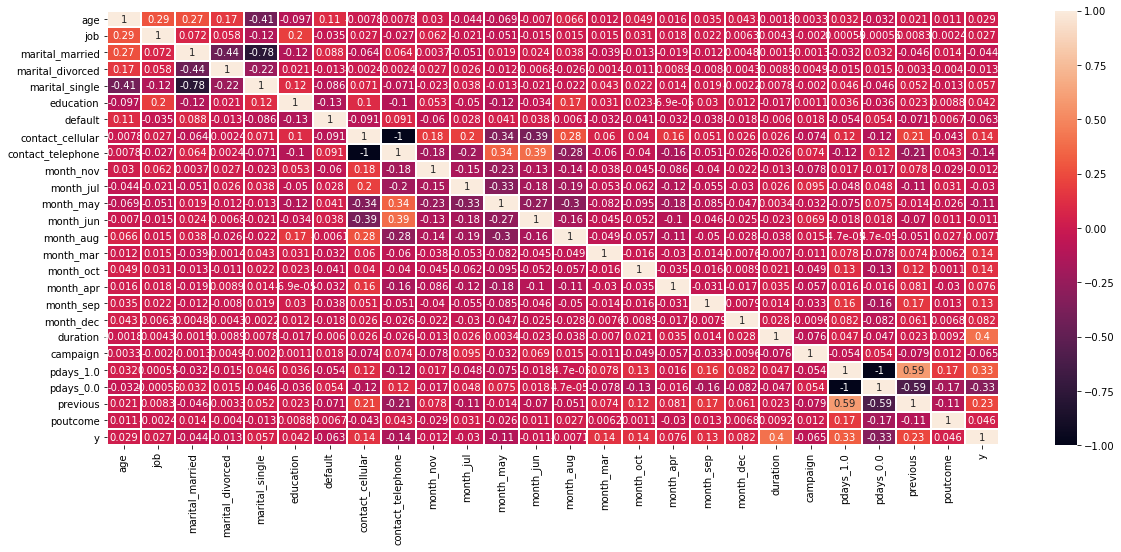

In [122]:
rcParams['figure.figsize'] = 20,8
sns.heatmap(df_new.corr(),annot=True,linecolor="white",linewidth=1)
plt.savefig("Newcorrplot")